# Import Library: 분석에 사용할 모듈 설치

In [1]:
!python -m pip install --user --upgrade pip
!pip install pandas-datareader
!pip install tqdm
!pip install xgboost
!pip install lightgbm
!pip install --user pmdarima

Requirement already up-to-date: pip in c:\users\kk\appdata\roaming\python\python37\site-packages (20.2.4)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\kk\\appdata\\roaming\\python\\python37\\site-packages\\~-ipy\\extra-dll\\libbispeu.5N2XSD7URZS4WTOSLTOG4DDMA4HGB46U.gfortran-win_amd64.dll'
Check the permissions.



In [2]:
# Auto reload
%reload_ext autoreload
%autoreload 2
from module import *

# Applying Agile Model: Y예측을 위한 ML분석 실행

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


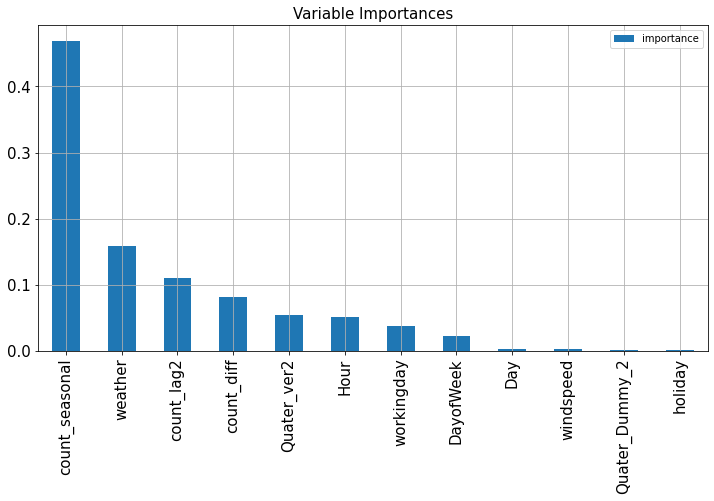

MAE      MSE  MAPE
Train  6.54   123.38  9.11
Test  51.52 6,749.92 40.49

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                         -16.29               0.40       0.83   
p-value                                   0.00               0.08       0.00   
Used Lag                                 27.00              41.00        nan   
Used Observations                    13,100.00                nan        nan   
Critical Value(1%)                       -3.43                nan        nan   
Maximum Information Criteria         98,935.70                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                       986.72        1,017.92         1,064.70   
p-value                                 0.00            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                      1,511.67               3.04  
p-value                                  0.00               0.00  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

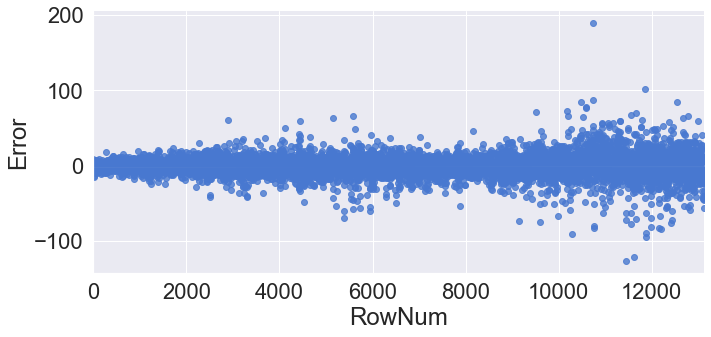

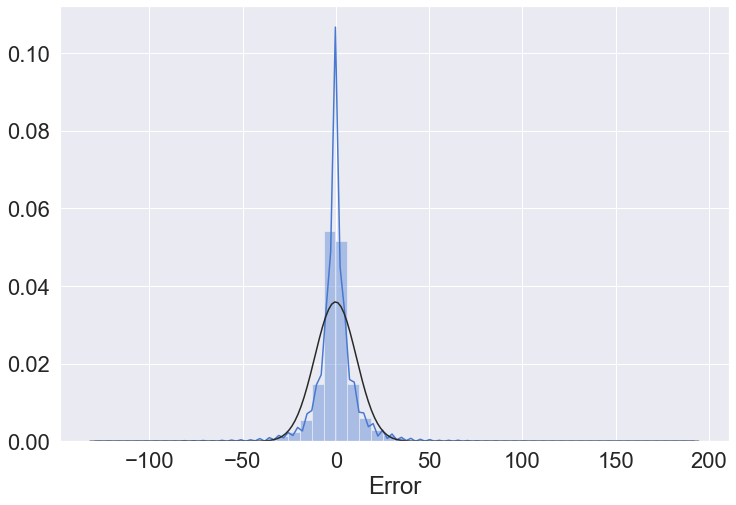

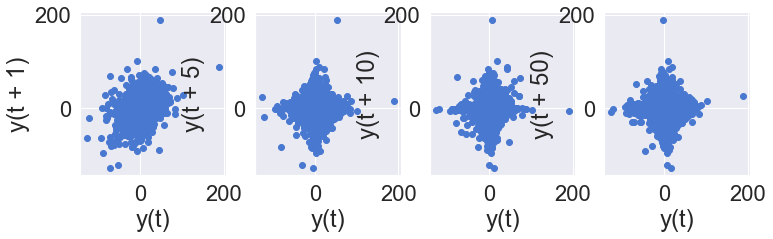

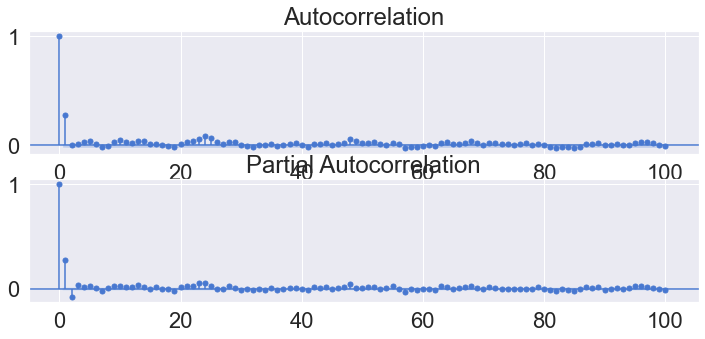

In [3]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# Applying Agile Model
# RandomForestRegressor
fit_reg6 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train_feRSM, Y_train_feR)
pred_tr_reg6_feRSM = fit_reg6.predict(X_train_feRSM)
pred_te_reg6_feRSM = fit_reg6.predict(X_test_feRSM)

# Prediction Effect of Variables
Variable_Importances = pd.DataFrame([fit_reg6.feature_importances_], 
                                    columns=X_train_feRSM.columns, 
                                    index=['importance']).T.sort_values(by=['importance'], ascending=False)
Variable_Importances.plot.bar(figsize=(12,6), fontsize=15)
plt.title('Variable Importances', fontsize=15)
plt.grid()
plt.show()

# Evaluation
Score_reg6_feRSM, Resid_tr_reg6_feRSM, Resid_te_reg6_feRSM = evaluation_trte(Y_train_feR, pred_tr_reg6_feRSM,
                                                                   Y_test_feR, pred_te_reg6_feRSM, graph_on=False)
display(Score_reg6_feRSM)

# Error Analysis
error_analysis(Resid_tr_reg6_feRSM, ['Error'], X_train_feRSM, graph_on=True)

# Applying Higher Model: Y예측을 위한 TS분석 실행

Test Statistics         -6.84
p-value                  0.00
Used Lag                41.00
Used Observations   13,086.00
dtype: float64

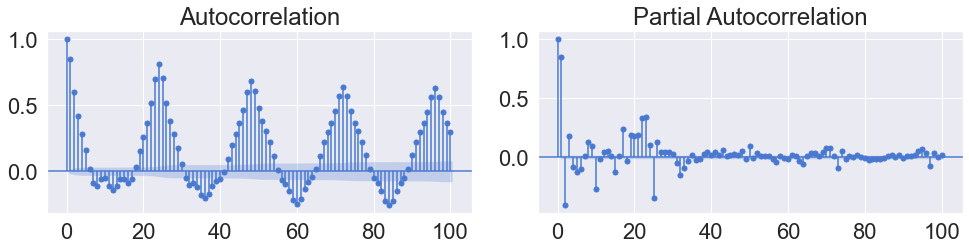

In [4]:
## 정상성 테스트 및 모수추론(p=1, q=1, d=0, P=1, Q=1, D(m)=12)
result = pd.Series(sm.tsa.stattools.adfuller(Y_train_feR.values.flatten())[0:4],
                   index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
display(result)

plt.figure(figsize=(14,4))
sm.tsa.graphics.plot_acf(Y_train_feR, lags=100, alpha=0.05, use_vlines=True, ax=plt.subplot(121))
sm.tsa.graphics.plot_pacf(Y_train_feR, lags=100, alpha=0.05, use_vlines=True, ax=plt.subplot(122))
plt.tight_layout()
plt.show()

## 수요예측 SARIMA 모델링

### 정상성 변환 미실행

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MAE       MSE   MAPE
Train  50.65  4,854.79 159.25
Test  167.63 42,661.82 559.15

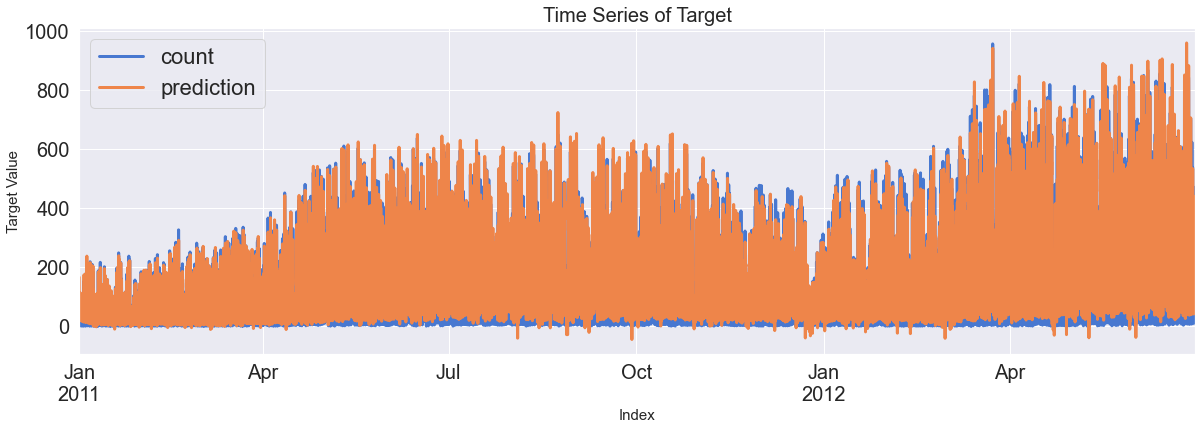

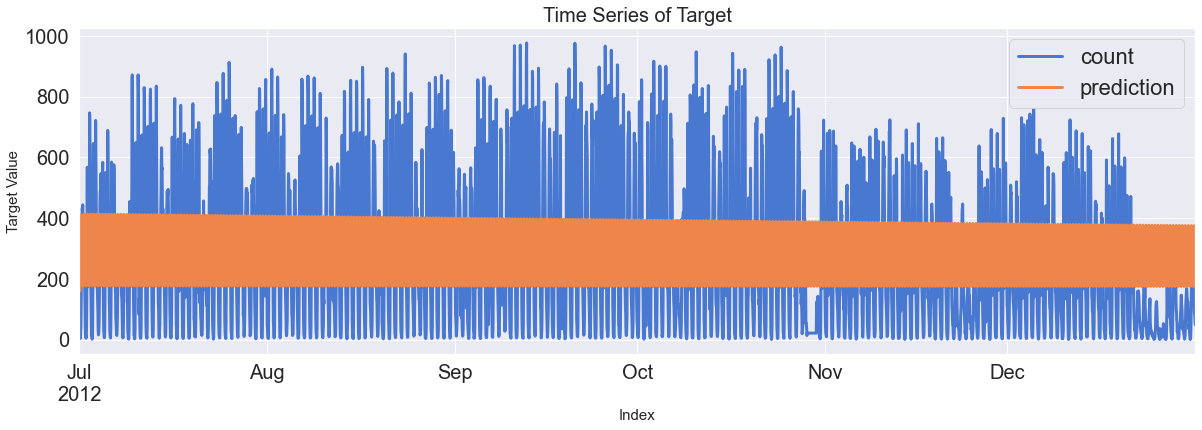

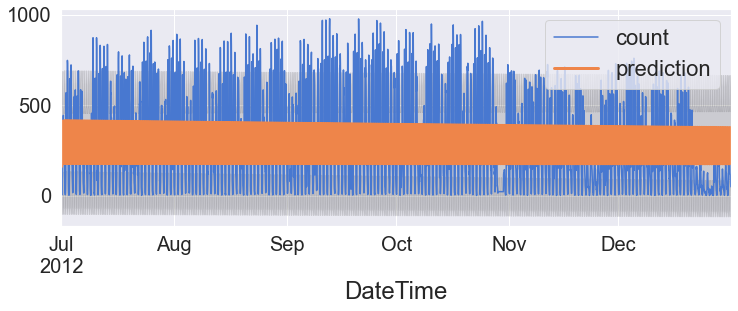

In [5]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Parameter Setting
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 12
## SARIMA
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order)).fit()
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR)).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR)).conf_int()
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

### 정상성 변환 오류

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MAE  MSE  MAPE
Train 0.43 0.32   inf
Test  1.17 1.90   inf

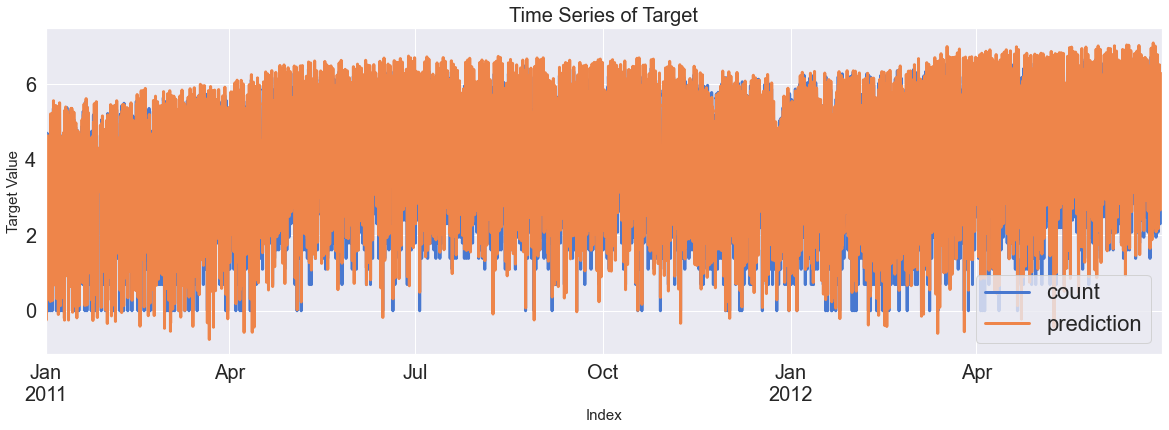

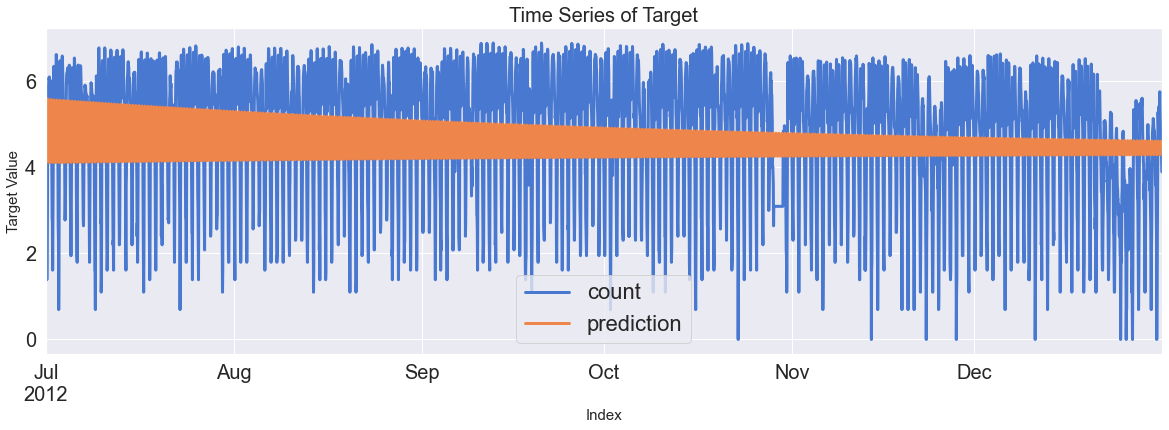

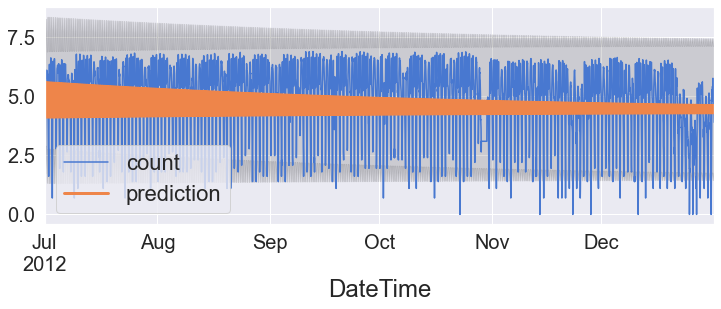

In [6]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Parameter Setting
logarithm = True
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 12
## 비정상성 데이터의 정상성 변환
if logarithm:
    Y_train_feR = np.log(Y_train_feR).copy()
    Y_test_feR = np.log(Y_test_feR).copy()
##############################
## SARIMA
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order)).fit()
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR)).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR)).conf_int()
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

### 정상성 변환 및 복원

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MAE       MSE   MAPE
Train  51.74  6,004.02  51.27
Test  184.10 66,836.99 213.88

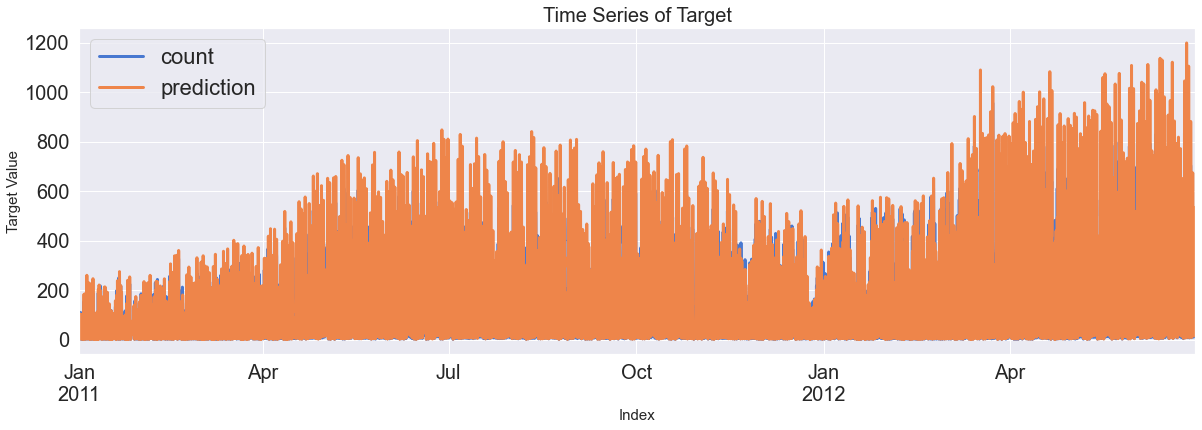

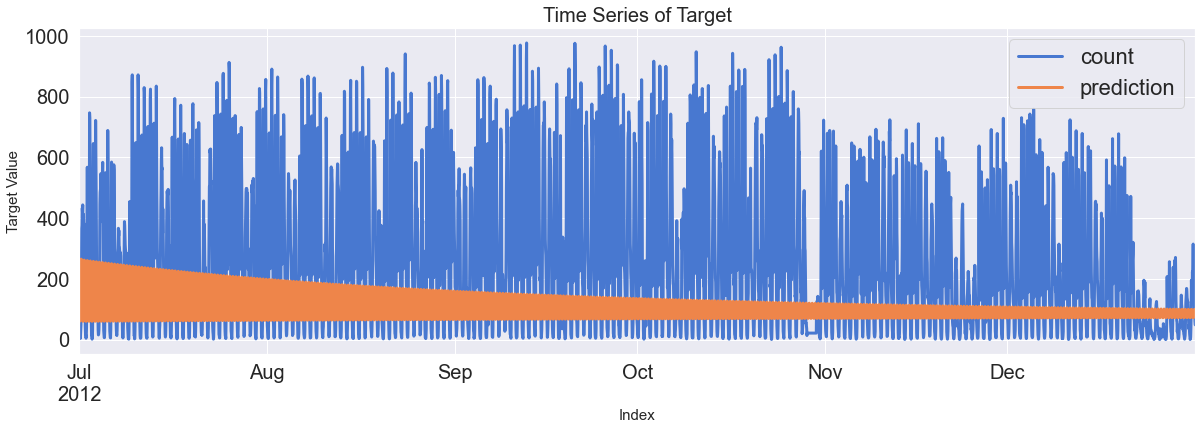

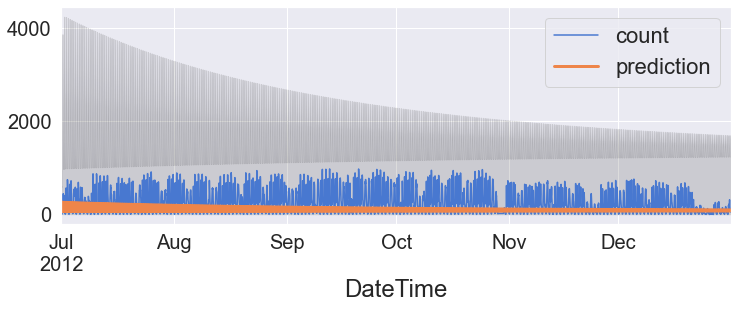

In [7]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Parameter Setting
logarithm = True
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 12
## 비정상성 데이터의 정상성 변환
if logarithm:
    Y_train_feR = np.log(Y_train_feR).copy()
    Y_test_feR = np.log(Y_test_feR).copy()
##############################
## SARIMA
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order)).fit()
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR)).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR)).conf_int()
## 정상성 데이터의 비정상성 변환
if logarithm:
    Y_train_feR = np.exp(Y_train_feR).copy()
    Y_test_feR = np.exp(Y_test_feR).copy()
    pred_tr_ts_sarimax = np.exp(pred_tr_ts_sarimax).copy()
    pred_te_ts_sarimax = np.exp(pred_te_ts_sarimax).copy()
    pred_te_ts_sarimax_ci = np.exp(pred_te_ts_sarimax_ci).copy()
##############################
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

###  Code Summary

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                13128
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -74351.482
Date:                            Thu, 19 Nov 2020   AIC                         148714.964
Time:                                    10:42:10   BIC                         148759.859
Sample:                                01-01-2011   HQIC                        148729.958
                                     - 06-30-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0213      0.016      1.294      0.196      -0.011       0.053
ar.L1          0.7235      0.005    131.718      0.000       0.713       0.734
ma.L1          0.5024      0.008     65.484      0.000       0.487       0.517
ar.S.L12       0.9995      0.000   3695.759      0.000       0.999       1.000
ma.S.L12      -0.9829      0.002   -621.820      0.000      -0.986      -0.980
sigma2      4848.9746     48.015    100.988      0.000    4754.866    4943.083
===================================================================================
Ljung-Box (Q):                    14870.85   Jarque-Bera (JB):              3717.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE       MSE   MAPE
Train  50.65  4,854.79 159.25
Test  167.63 42,661.82 559.15

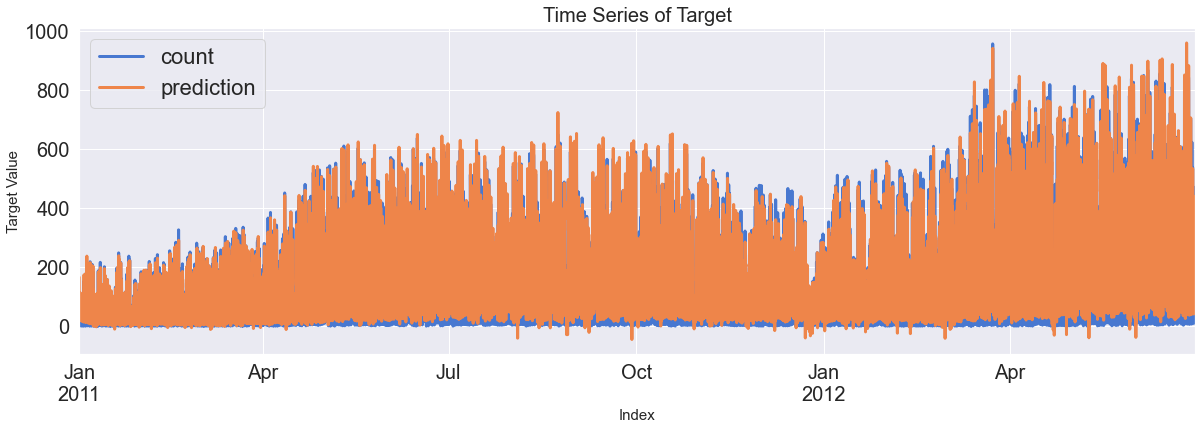

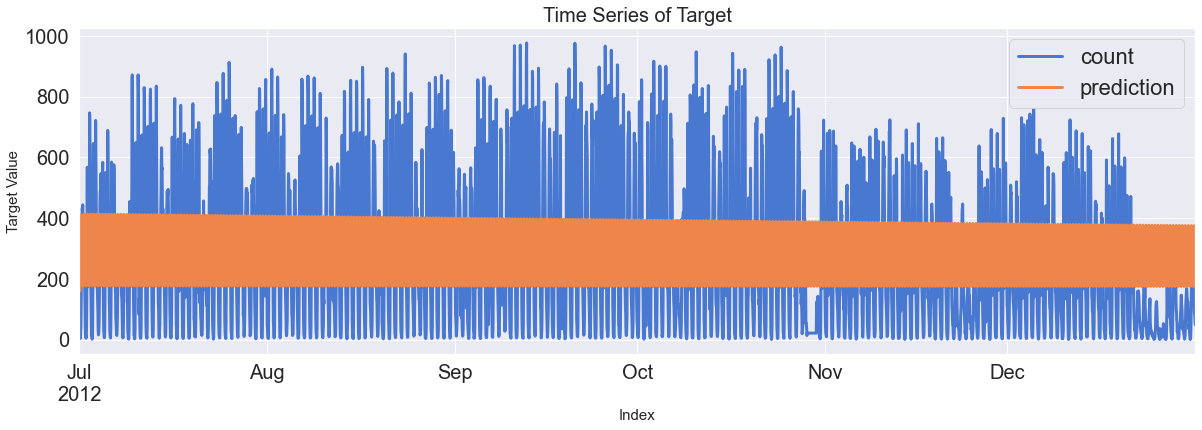

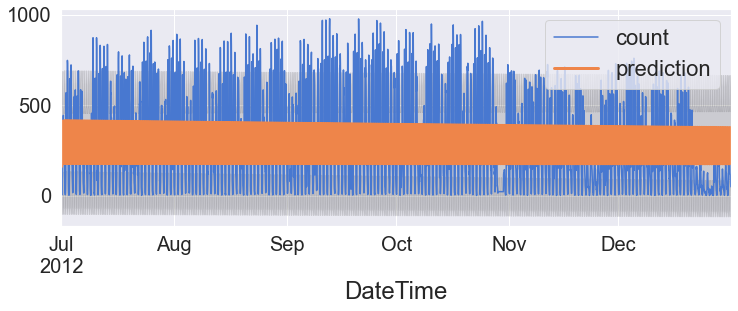

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                         -14.66               1.02       0.96   
p-value                                   0.00               0.01       0.00   
Used Lag                                 40.00              41.00        nan   
Used Observations                    13,087.00                nan        nan   
Critical Value(1%)                       -3.43                nan        nan   
Maximum Information Criteria        139,503.14                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                        27.98          576.23         2,002.56   
p-value                                 0.00            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                     17,417.59               1.70  
p-value                                  0.00               0.00  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

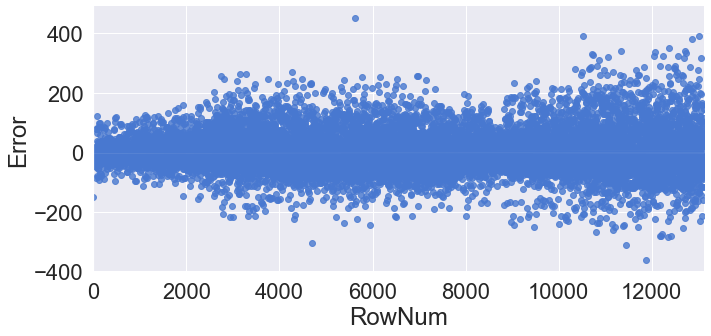

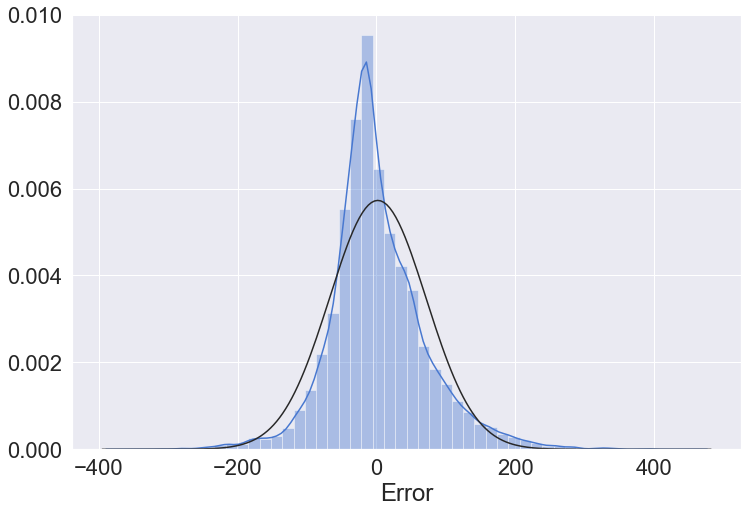

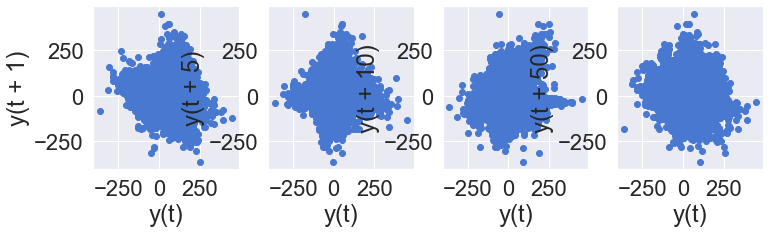

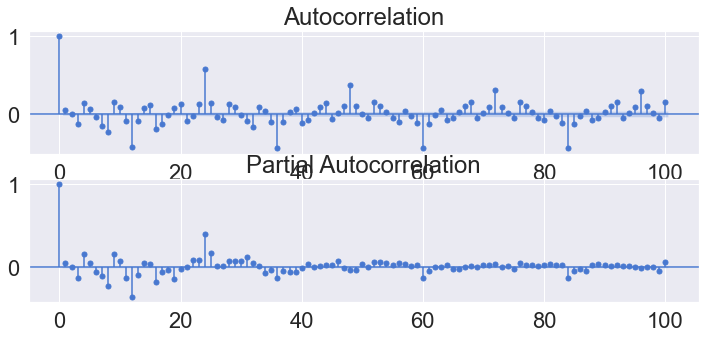

In [8]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Parameter Setting
logarithm = False
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 12
## 비정상성 데이터의 정상성 변환
if logarithm:
    Y_train_feR = np.log(Y_train_feR).copy()
    Y_test_feR = np.log(Y_test_feR).copy()
##############################
## SARIMA
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order)).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR)).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR)).conf_int()
## 정상성 데이터의 비정상성 변환
if logarithm:
    Y_train_feR = np.exp(Y_train_feR).copy()
    Y_test_feR = np.exp(Y_test_feR).copy()
    pred_tr_ts_sarimax = np.exp(pred_tr_ts_sarimax).copy()
    pred_te_ts_sarimax = np.exp(pred_te_ts_sarimax).copy()
    pred_te_ts_sarimax_ci = np.exp(pred_te_ts_sarimax_ci).copy()
##############################
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train_feR, graph_on=True)

## 수요예측 SARIMAX 모델링

### 독립변수 일부 반영

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                13128
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -72618.534
Date:                            Thu, 19 Nov 2020   AIC                         145265.068
Time:                                    10:43:40   BIC                         145369.823
Sample:                                01-01-2011   HQIC                        145300.052
                                     - 06-30-2012                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0005      0.001      0.894      0.371      -0.001       0.002
count_seasonal  1205.5209     18.190     66.273      0.000    1169.869    1241.173
weather        -1.678e+04     27.946   -600.501      0.000   -1.68e+04   -1.67e+04
count_lag2      1030.1900     12.425     82.912      0.000    1005.837    1054.543
count_diff      1264.5296     10.443    121.092      0.000    1244.062    1284.997
Quater_ver2     3.292e+04      9.904   3324.079      0.000    3.29e+04    3.29e+04
Hour           -3279.2456    189.233    -17.329      0.000   -3650.134   -2908.357
workingday      7.489e+04      5.707   1.31e+04      0.000    7.49e+04    7.49e+04
DayofWeek       1.594e+04     27.690    575.562      0.000    1.59e+04     1.6e+04
ar.L1              0.3851      0.008     50.829      0.000       0.370       0.400
ma.L1              0.5183      0.007     71.651      0.000       0.504       0.532
ar.S.L12           1.0000   9.76e-06   1.03e+05      0.000       1.000       1.000
ma.S.L12          -0.9953      0.000  -3569.806      0.000      -0.996      -0.995
sigma2          2981.6045     22.765    130.973      0.000    2936.986    3026.223
===================================================================================
Ljung-Box (Q):                     7226.97   Jarque-Bera (JB):             15673.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.57   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.51e+18. Standard errors may be unstable.
"""

MAE       MSE   MAPE
Train  41.35  3,645.60 106.54
Test  104.93 18,843.89 211.72

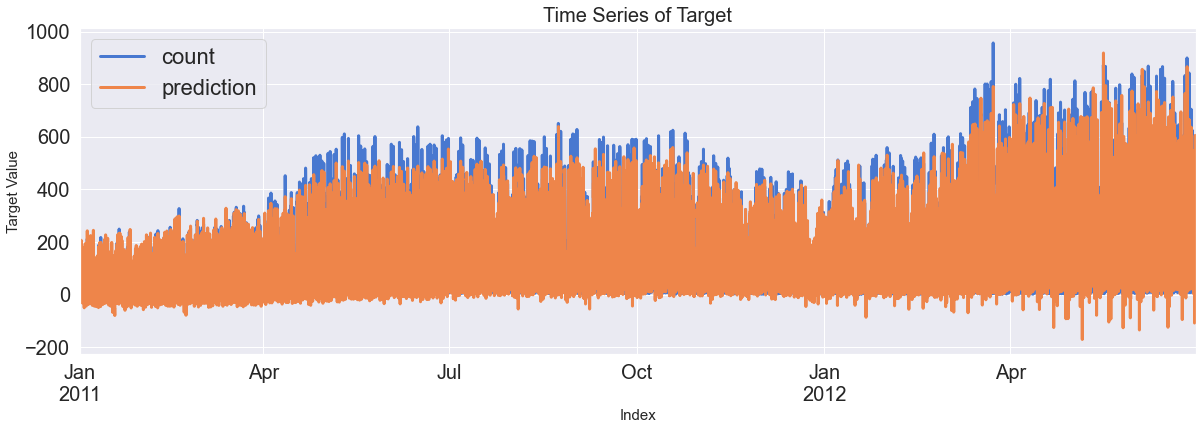

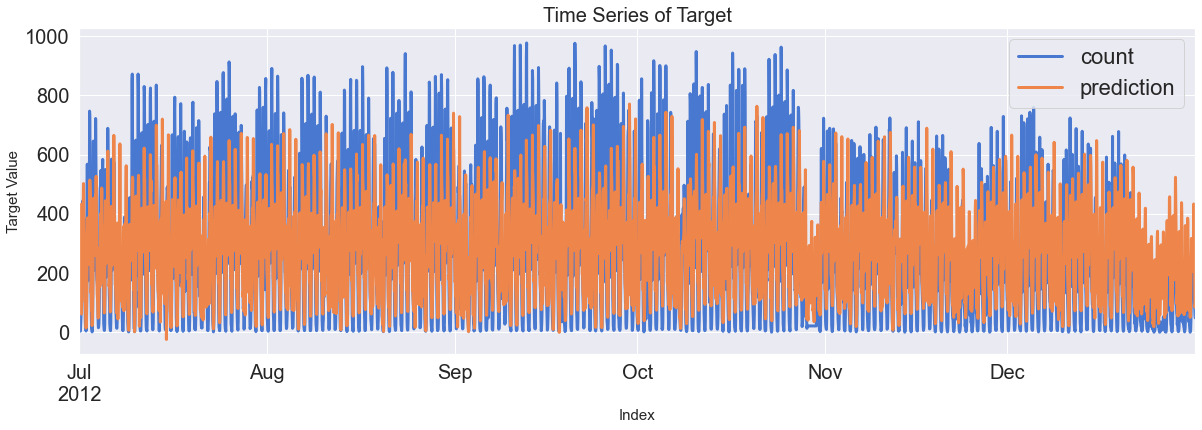

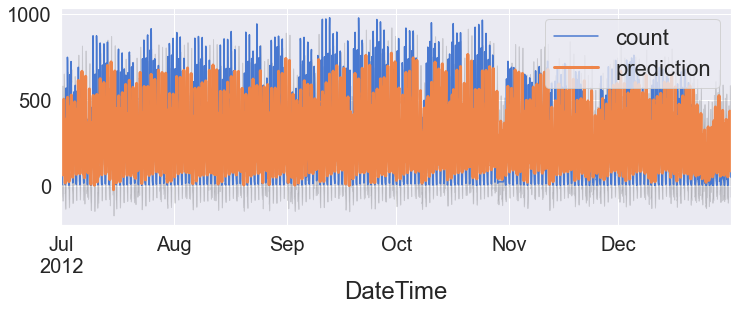

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                         -10.76               2.67       0.93   
p-value                                   0.00               0.01       0.00   
Used Lag                                 41.00              41.00        nan   
Used Observations                    13,086.00                nan        nan   
Critical Value(1%)                       -3.43                nan        nan   
Maximum Information Criteria        139,651.53                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                        22.29          372.99         2,033.87   
p-value                                 0.00            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                      7,673.17               2.48  
p-value                                  0.00               0.00  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

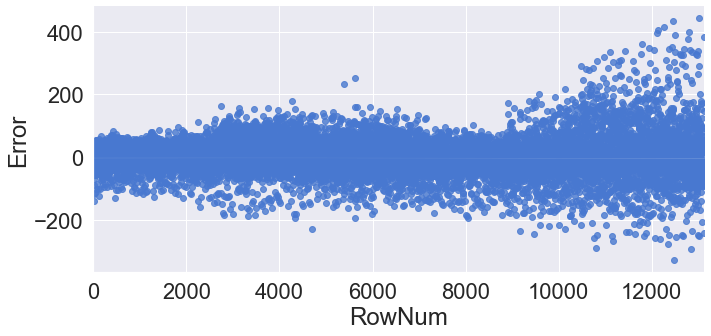

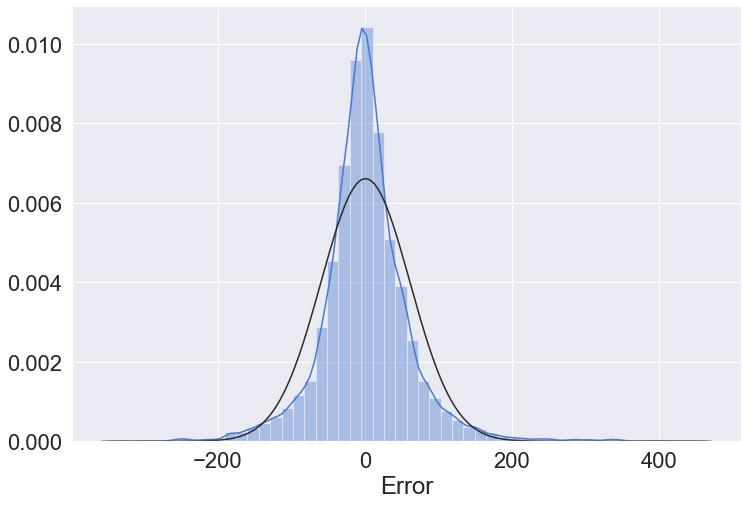

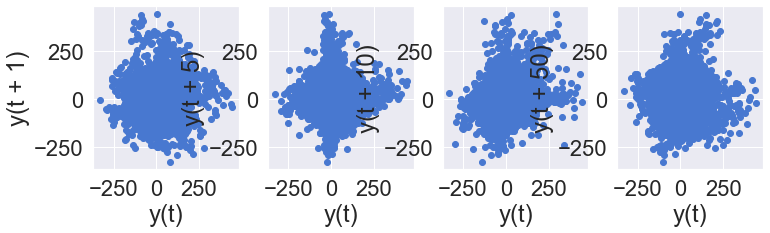

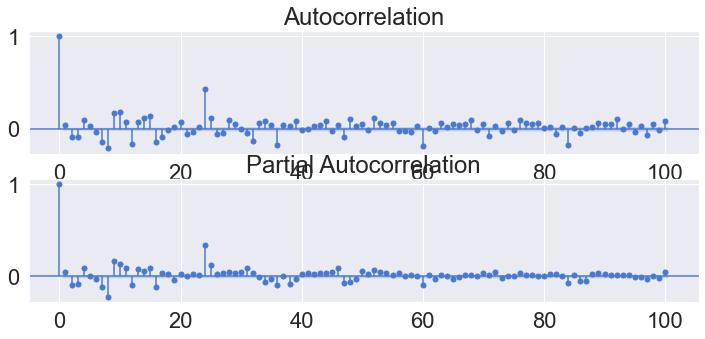

In [9]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Additional Features
exog_tr = X_train_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]
exog_te = X_test_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]                             
## Parameter Setting
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 12
## SARIMAX
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order), 
                                exog=exog_tr).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=exog_te).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=exog_te).conf_int()
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train_feR, graph_on=True)

### 독립변수 전체 반영

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                13128
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -71305.504
Date:                            Thu, 19 Nov 2020   AIC                         142647.008
Time:                                    10:45:16   BIC                         142781.693
Sample:                                01-01-2011   HQIC                        142691.988
                                     - 06-30-2012                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         76.6890      1.443     53.147      0.000      73.861      79.517
count_diff       847.2276      0.030   2.79e+04      0.000     847.168     847.287
holiday         7.141e+04   1.61e-05   4.44e+09      0.000    7.14e+04    7.14e+04
count_seasonal  1211.7152      0.002   5.01e+05      0.000    1211.710    1211.720
Day             1149.5009      0.011   1.02e+05      0.000    1149.479    1149.523
windspeed       -233.9659      0.009  -2.67e+04      0.000    -233.983    -233.949
Quater_ver2     2.865e+04      0.003   9.28e+06      0.000    2.86e+04    2.86e+04
Hour           -3505.8091      0.008  -4.33e+05      0.000   -3505.825   -3505.793
weather        -2.423e+04      0.001  -2.46e+07      0.000   -2.42e+04   -2.42e+04
Quater_Dummy_2  6.725e+04      0.000   1.97e+08      0.000    6.72e+04    6.72e+04
DayofWeek       1.621e+04      0.002    6.7e+06      0.000    1.62e+04    1.62e+04
workingday      7.695e+04      0.000   1.88e+08      0.000     7.7e+04     7.7e+04
count_lag2       718.5969      0.117   6138.957      0.000     718.367     718.826
ar.L1              0.4990      0.005     91.834      0.000       0.488       0.510
ma.L1              0.5844      0.006     94.650      0.000       0.572       0.597
ar.S.L12          -1.0000    2.6e-07  -3.84e+06      0.000      -1.000      -1.000
ma.S.L12           0.9735      0.002    612.177      0.000       0.970       0.977
sigma2          2644.8087      0.013   2.09e+05      0.000    2644.784    2644.834
===================================================================================
Ljung-Box (Q):                     5124.53   Jarque-Bera (JB):             12883.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+23. Standard errors may be unstable.
"""

MAE       MSE   MAPE
Train  39.48  3,011.63 138.16
Test  106.41 18,487.27 206.42

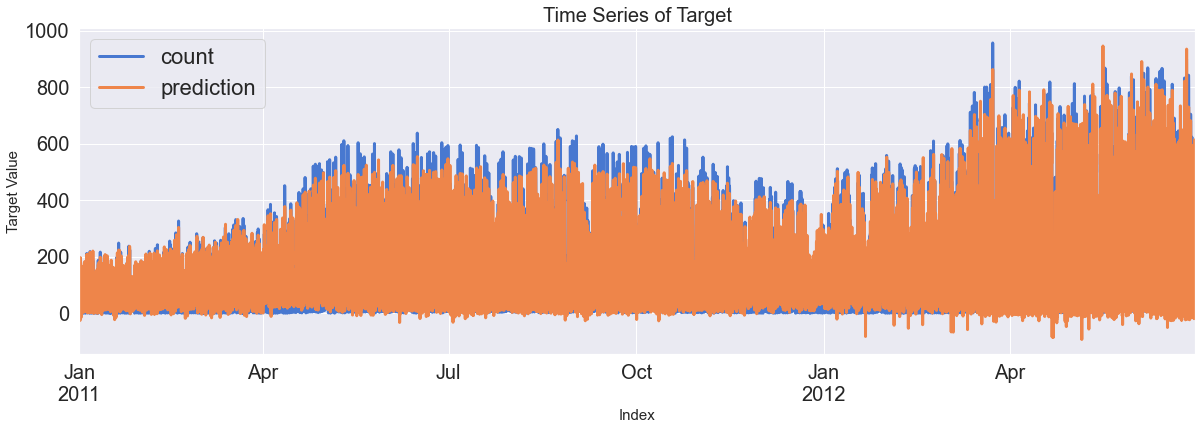

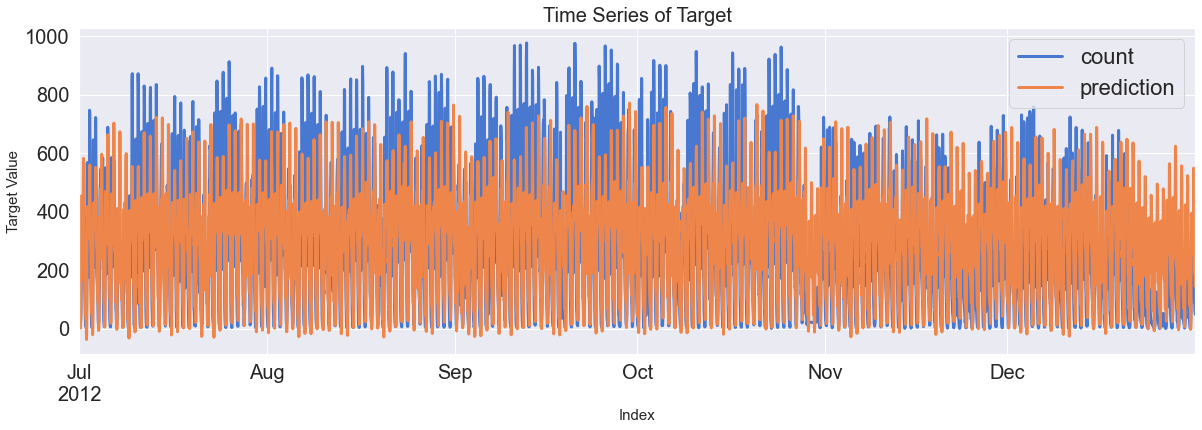

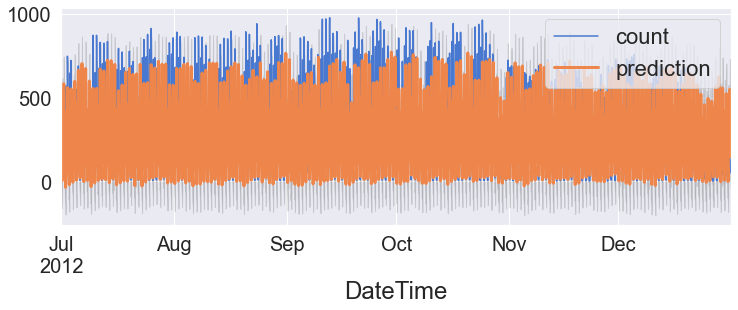

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                          -9.71               1.76       0.94   
p-value                                   0.00               0.01       0.00   
Used Lag                                 41.00              41.00        nan   
Used Observations                    13,086.00                nan        nan   
Critical Value(1%)                       -3.43                nan        nan   
Maximum Information Criteria        136,864.27                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                         0.39           58.30         1,512.00   
p-value                                 0.53            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                      5,623.95               2.39  
p-value                                  0.00               0.00  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

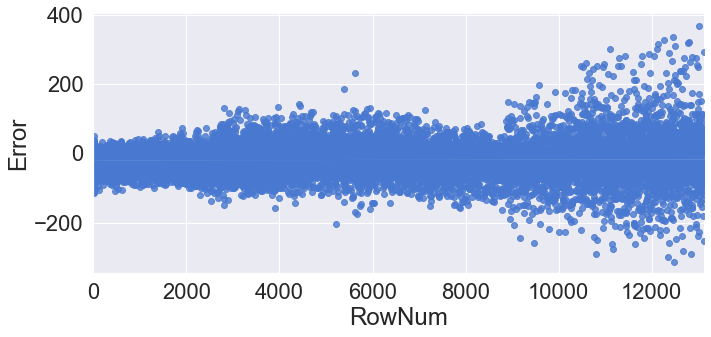

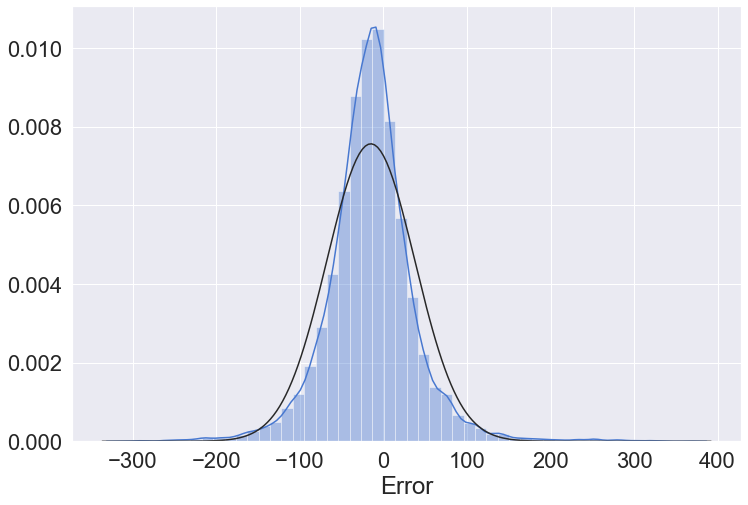

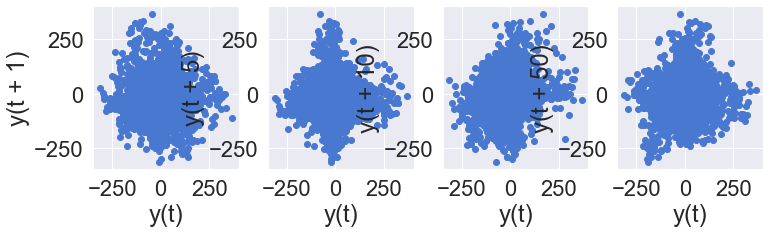

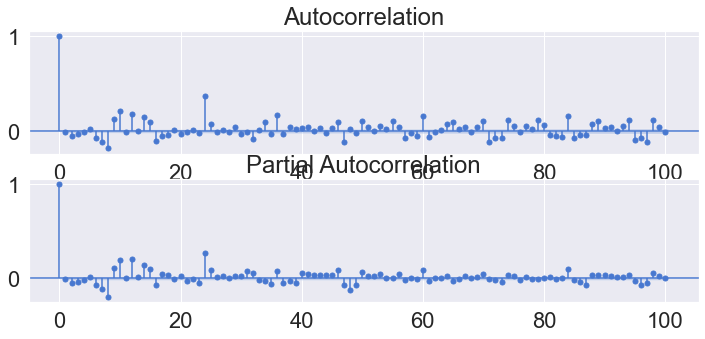

In [10]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Additional Features
# exog_tr = X_train_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]
# exog_te = X_test_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]
## Parameter Setting
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 12
## SARIMAX
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order), 
                                exog=X_train_feRSM).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=X_test_feRSM).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=X_test_feRSM).conf_int()
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train_feR, graph_on=True)

### 계절성 차수 변경 (12 -> 24)

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                13128
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -69537.069
Date:                            Thu, 19 Nov 2020   AIC                         139110.138
Time:                                    10:49:08   BIC                         139244.823
Sample:                                01-01-2011   HQIC                        139155.118
                                     - 06-30-2012                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         17.6963      3.576      4.949      0.000      10.688      24.704
count_diff       556.4470      7.671     72.534      0.000     541.411     571.483
holiday         7.141e+04   1.59e+04      4.499      0.000    4.03e+04    1.03e+05
count_seasonal  1223.4274     18.693     65.447      0.000    1186.789    1260.066
Day             1150.2033    446.203      2.578      0.010     275.661    2024.745
windspeed       -233.3799    120.778     -1.932      0.053    -470.100       3.340
Quater_ver2     2.865e+04   3378.047      8.480      0.000     2.2e+04    3.53e+04
Hour           -3510.5138    446.116     -7.869      0.000   -4384.884   -2636.143
weather        -2.423e+04   1491.005    -16.251      0.000   -2.72e+04   -2.13e+04
Quater_Dummy_2  6.725e+04   1.05e+04      6.422      0.000    4.67e+04    8.78e+04
DayofWeek       1.621e+04   1885.594      8.596      0.000    1.25e+04    1.99e+04
workingday      7.695e+04   8542.875      9.008      0.000    6.02e+04    9.37e+04
count_lag2       506.3692     27.335     18.525      0.000     452.794     559.944
ar.L1              0.4873      0.013     38.133      0.000       0.462       0.512
ma.L1              0.6097      0.012     52.348      0.000       0.587       0.633
ar.S.L24           0.3159      0.010     30.769      0.000       0.296       0.336
ma.S.L24           0.1816      0.011     17.280      0.000       0.161       0.202
sigma2          2336.7202     17.599    132.778      0.000    2302.227    2371.213
===================================================================================
Ljung-Box (Q):                     1743.22   Jarque-Bera (JB):             30267.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.92   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE       MSE   MAPE
Train  31.71  2,334.48  78.58
Test  113.08 23,041.69 265.75

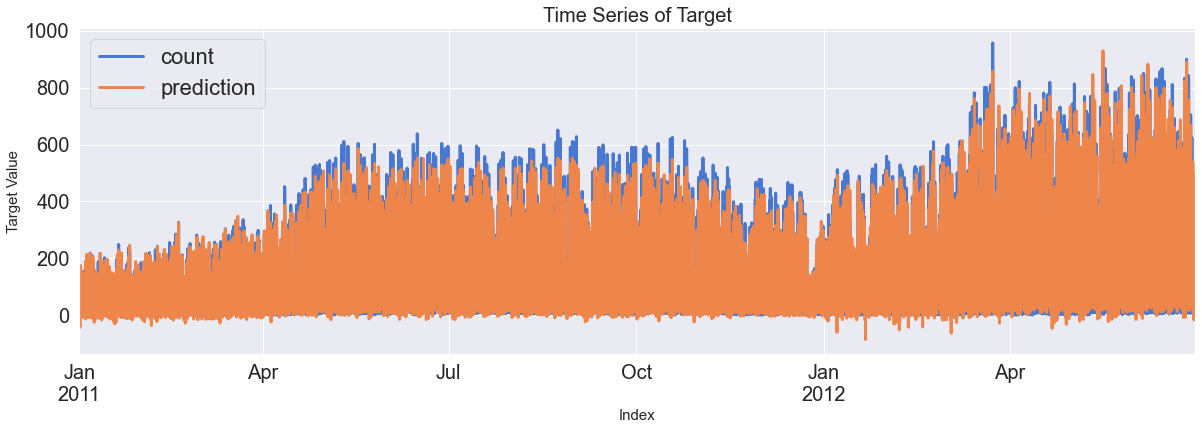

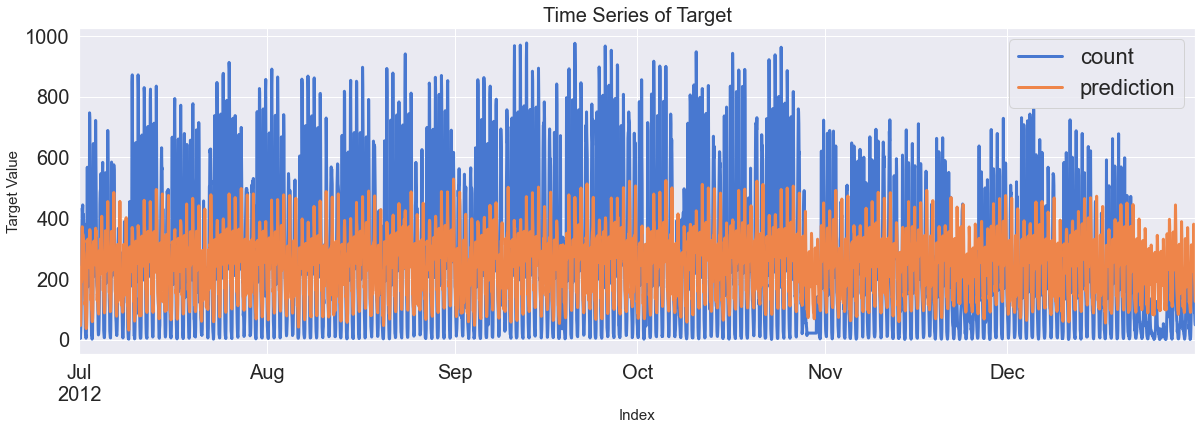

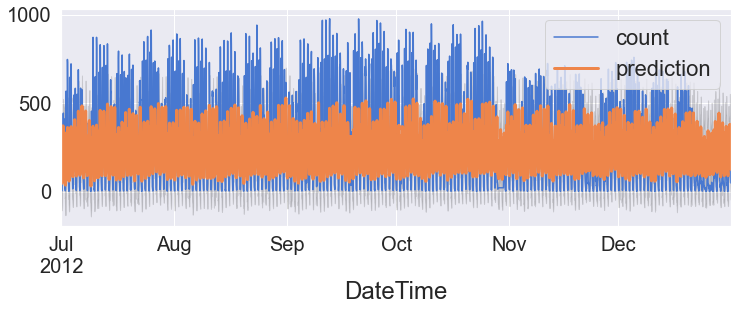

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                         -15.87               1.91       0.90   
p-value                                   0.00               0.01       0.00   
Used Lag                                 41.00              41.00        nan   
Used Observations                    13,086.00                nan        nan   
Critical Value(1%)                       -3.43                nan        nan   
Maximum Information Criteria        137,033.91                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                         3.46           49.18         1,041.26   
p-value                                 0.06            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                      1,882.22               2.50  
p-value                                  0.00               0.00  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

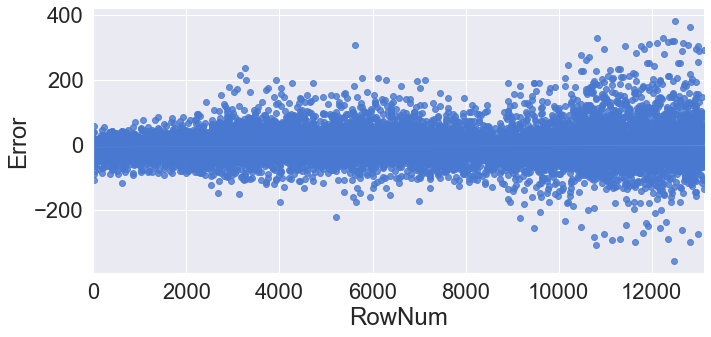

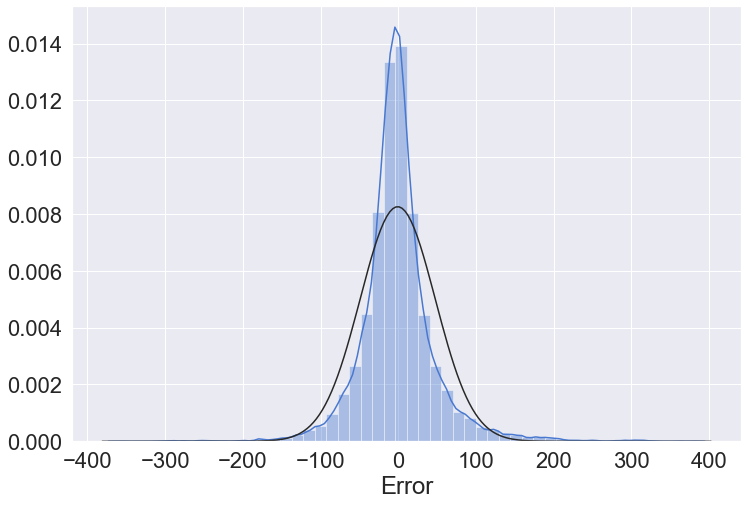

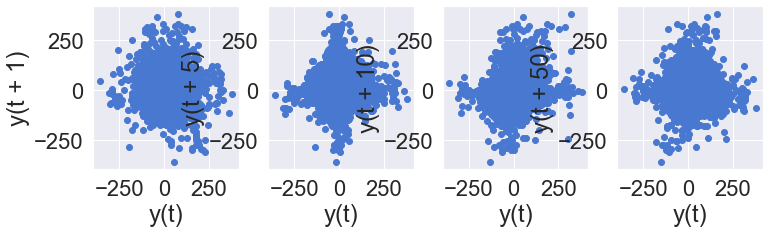

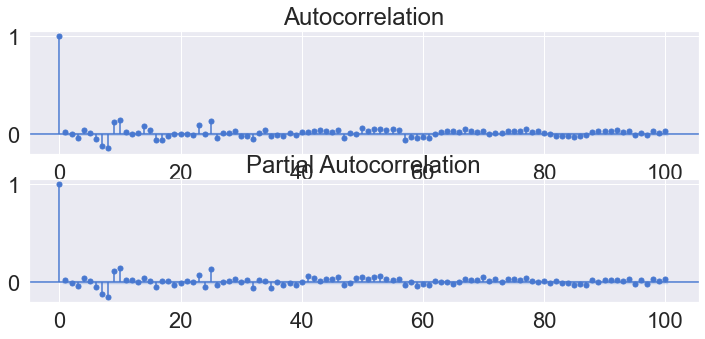

In [11]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Parameter Setting
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 24
## SARIMAX
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=(1,trend_diff_order,1), 
                                seasonal_order=(1,seasonal_diff_order,1,seasonal_order), 
                                exog=X_train_feRSM).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=X_test_feRSM).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=X_test_feRSM).conf_int()
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train_feR, graph_on=True)

## 수요예측 Automation

### Auto-SARIMAX

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Number_of_Selected_X:  12


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=142236.40044524026, BIC=142341.14267917175


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=141418.21652908495, BIC=141530.44035115442


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=141057.3330988703, BIC=141169.55692093977


 25%|████████████████████                                                            | 1/4 [26:22<1:19:07, 1582.64s/it]

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=141281.6452508199, BIC=141401.35066102736


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=142426.57932878862, BIC=142538.8031508581


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=141352.3507726066, BIC=141472.05618281403


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=141240.34730544247, BIC=141360.05271564992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 50%|█████████████████████████████████████████                                         | 2/4 [59:16<56:39, 1699.90s/it]

Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=141256.97336881922, BIC=141384.16036716462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=142430.9680540586, BIC=142543.19187612808


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=141224.2174751241, BIC=141343.92288533156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=141070.32520381533, BIC=141190.03061402278


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 75%|████████████████████████████████████████████████████████████                    | 3/4 [1:25:58<27:50, 1670.69s/it]

Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=141270.619200354, BIC=141397.8061986994


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=142426.3768071371, BIC=142546.08221734455


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=141414.0340896983, BIC=141541.2210880437


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=140960.41611007476, BIC=141087.60310842015


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [1:56:17<00:00, 1744.29s/it]

Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=141235.22880165622, BIC=141369.8973881396
The smallest AIC is 140960.41611007476 for model SARIMAX(2, 0, 2)x(2, 1, 1, 12)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                count   No. Observations:                13128
Model:             SARIMAX(2, 0, 2)x(2, 1, [1], 12)   Log Likelihood              -70463.208
Date:                              Thu, 19 Nov 2020   AIC                         140960.416
Time:                                      12:53:32   BIC                         141087.603
Sample:                                  01-01-2011   HQIC                        141002.894
                                       - 06-30-2012                                         
Covariance Type:                                opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.6980      0.093      7.522      0.000       0.516       0.880
count_seasonal  1378.1404     30.451     45.258      0.000    1318.458    1437.823
weather        -3.875e+04   1694.422    -22.869      0.000   -4.21e+04   -3.54e+04
count_lag2       396.3429     20.167     19.653      0.000     356.817     435.869
count_diff      1006.0782     10.613     94.796      0.000     985.277    1026.879
Quater_ver2    -6.417e+05   8126.526    -78.967      0.000   -6.58e+05   -6.26e+05
Hour           -1559.8433    635.846     -2.453      0.014   -2806.079    -313.608
workingday     -2118.5354   7043.329     -0.301      0.764   -1.59e+04    1.17e+04
DayofWeek        371.0573   1697.321      0.219      0.827   -2955.631    3697.746
ar.L1             -0.4629      0.011    -41.941      0.000      -0.485      -0.441
ar.L2              0.4655      0.009     54.352      0.000       0.449       0.482
ma.L1              1.4699      0.012    126.101      0.000       1.447       1.493
ma.L2              0.4795      0.011     45.018      0.000       0.459       0.500
ar.S.L12          -0.0124      0.008     -1.516      0.129      -0.028       0.004
ar.S.L24           0.4332      0.006     74.495      0.000       0.422       0.445
ma.S.L12          -0.9436      0.004   -252.385      0.000      -0.951      -0.936
sigma2          2693.1084     22.815    118.039      0.000    2648.391    2737.826
===================================================================================
Ljung-Box (Q):                     2456.59   Jarque-Bera (JB):             57369.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.50   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.77e+14. Standard errors may be unstable.
"""

MAE       MSE   MAPE
Train  33.86  2,860.51 103.04
Test  231.23 73,539.94 577.24

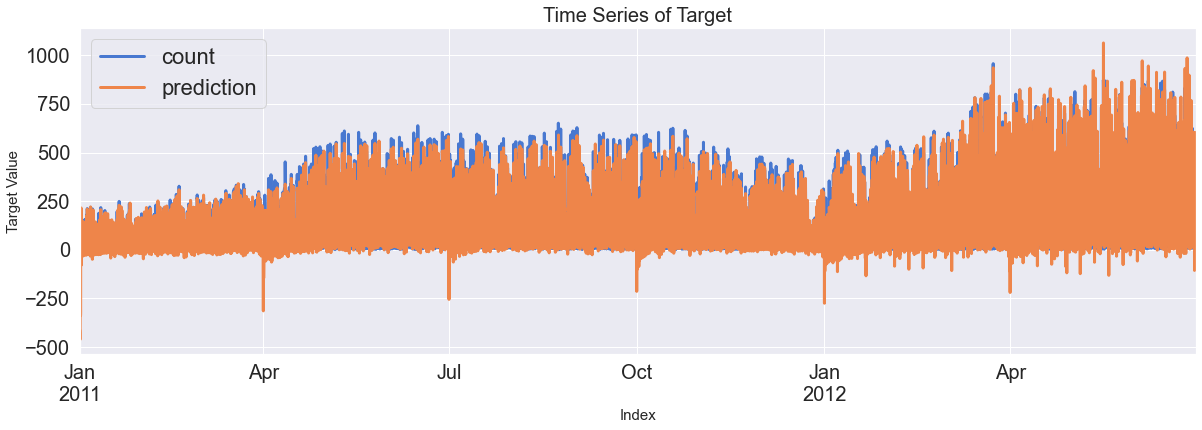

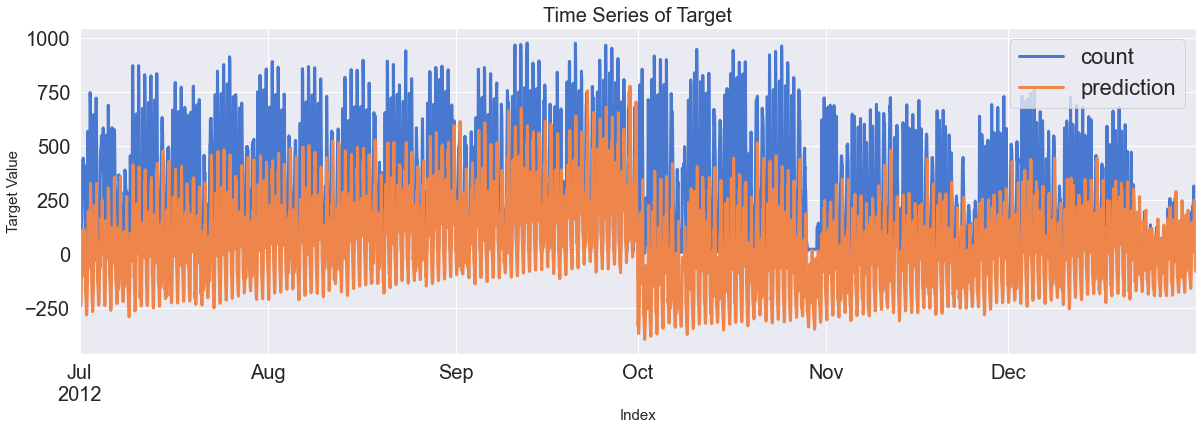

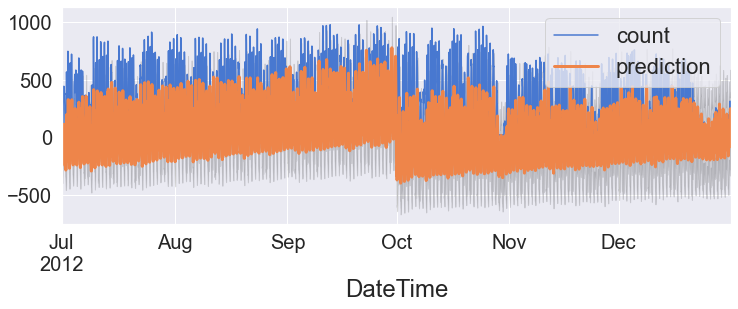

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                         -10.39               0.16       0.87   
p-value                                   0.00               0.10       0.00   
Used Lag                                 41.00              41.00        nan   
Used Observations                    13,086.00                nan        nan   
Critical Value(1%)                       -3.43                nan        nan   
Maximum Information Criteria        138,540.67                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                        39.01          295.74         1,304.41   
p-value                                 0.00            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                      2,939.87               2.47  
p-value                                  0.00               0.00  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

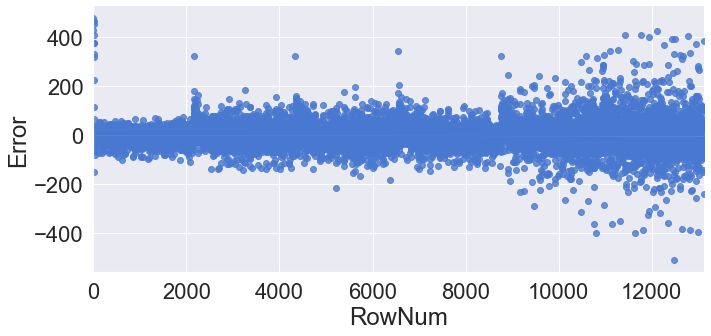

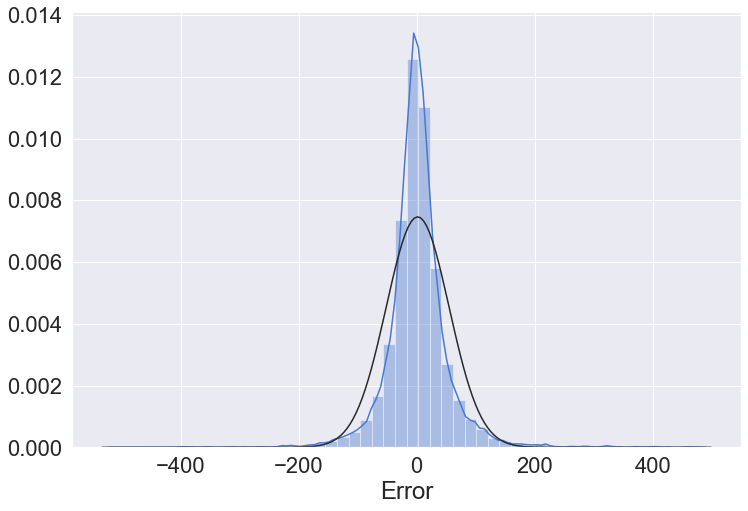

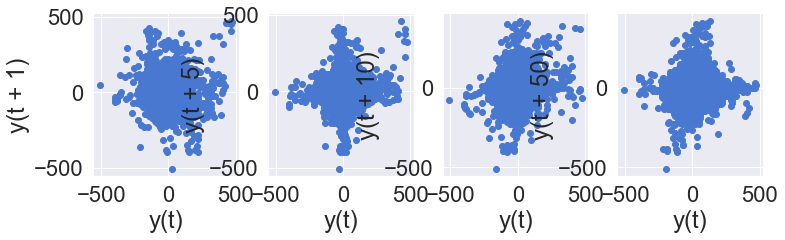

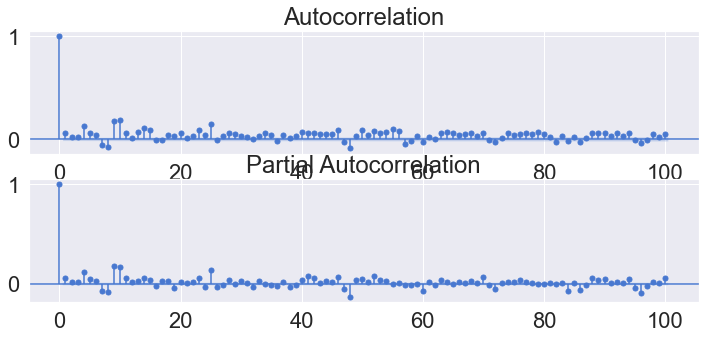

In [12]:
# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Additional Features
exog_tr = X_train_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]
exog_te = X_test_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]                             
## Parameter Setting
p, q = range(1,3), range(1,3)
d = range(0,1)
P, Q = range(1,3), range(1,3)
D = range(1,2)
m = 12
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result =sm.tsa.SARIMAX(Y_train_feR, trend='c', 
                                   order=trend_param, seasonal_order=seasonal_params, exog=exog_tr).fit()
            print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0],
                                                             SARIMAX_order[AIC.index(min(AIC))][1]))
## Auto-SARIMAX Fitting
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train_feR, trend='c', order=SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order=SARIMAX_order[AIC.index(min(AIC))][1], exog=exog_tr).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=exog_te).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test_feR), exog=exog_te).conf_int()
    
# 검증
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_feR, pred_tr_ts_sarimax, 
                                                                             Y_test_feR, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train_feR, graph_on=True)

### Auto-ARIMA (old)

In [13]:
# # 모델링
# ## Additional Features
# exog_tr = X_train_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]
# exog_te = X_test_feRSM[['count_seasonal', 'weather', 'count_lag2', 'count_diff', 'Quater_ver2', 'Hour', 'workingday', 'DayofWeek']]                             
# ## Auto-ARIMA
# fit_ts_autoarima = auto_arima(Y_train_feR, exogenous=exog_tr, stationary=False,
#                               trend='c', start_p=0, start_q=0, max_p=2, max_q=2, max_d=1,
#                               seasonal=True, start_P=0, start_Q=0, max_P=1, max_Q=1, m=12,
#                               stepwise=True, trace=True)
# display(fit_ts_autoarima.summary())
# pred_tr_ts_autoarima = fit_ts_autoarima.predict_in_sample(exogenous=exog_tr)
# pred_te_ts_autoarima = fit_ts_autoarima.predict(len(Y_test_feR), exogenous=exog_te, return_conf_int=True)[0]
# pred_te_ts_autoarima_ci = fit_ts_autoarima.predict(len(Y_test_feR), exogenous=exog_te, return_conf_int=True)[1]
    
# # 검증
# Score_ts_autoarima, Resid_tr_ts_autoarima, Resid_te_ts_autoarima = evaluation_trte(Y_train_feR, pred_tr_ts_autoarima, 
#                                                                              Y_test_feR, pred_te_ts_autoarima, graph_on=True)
# display(Score_ts_autoarima)
# ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
# pd.DataFrame(pred_te_ts_autoarima, index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
#                                                                            xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
#                                                                            linewidth=3, fontsize=20, ax=ax)
# ax.fill_between(pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test_feR.index).index,
#                 pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test_feR.index).iloc[:,0],
#                 pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
# plt.show()

# # 잔차진단
# error_analysis(Resid_tr_ts_autoarima, ['Error'], Y_train_feR, graph_on=True)

### Auto-ARIMA (new)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : BIC=2939.904, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=3055.604, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=2966.990, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=2959.044, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=3050.616, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : BIC=2961.135, Time=0.11 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : BIC=2936.679, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : BIC=3004.372, Time=0.05 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : BIC=2939.306, Time=0.31 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : BIC=2945.447, Time=0.37 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : BIC=2943.005, Time=0.10 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : BIC=2929.579, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : BIC=2997.133, Time=0.03 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : BIC=2932.358, Time=0.37 sec
 ARIMA(2,1,1)(1,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  150
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1449.505
Date:                             Thu, 19 Nov 2020   AIC                           2909.011
Time:                                     12:53:50   BIC                           2924.030
Sample:                                          0   HQIC                          2915.113
                                             - 150                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0828      0.214      0.386      0.699      -0.337       0.503
ar.L2         -0.2424      0.227     -1.066      0.286      -0.688       0.203
ma.L1         -0.8241      0.058    -14.200      0.000      -0.938      -0.710
ar.S.L12       0.7035      0.097      7.245      0.000       0.513       0.894
sigma2      2.844e+07   1.66e-09   1.71e+16      0.000    2.84e+07    2.84e+07
===================================================================================
Ljung-Box (Q):                       30.91   Jarque-Bera (JB):               169.37
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.66
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.77e+31. Standard errors may be unstable.
"""

MAE           MSE  MAPE
Train 5,300.63 40,059,097.36 23.61
Test  2,427.79  9,293,713.34 10.76

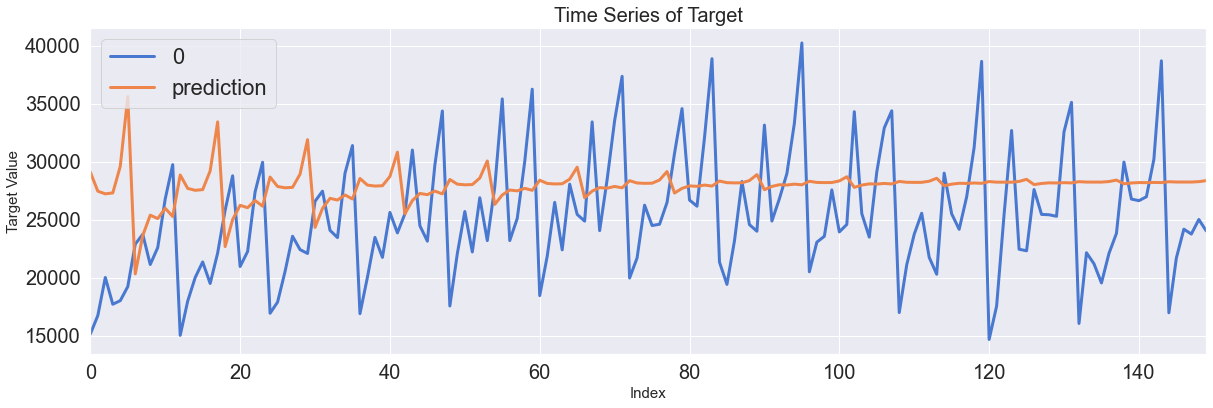

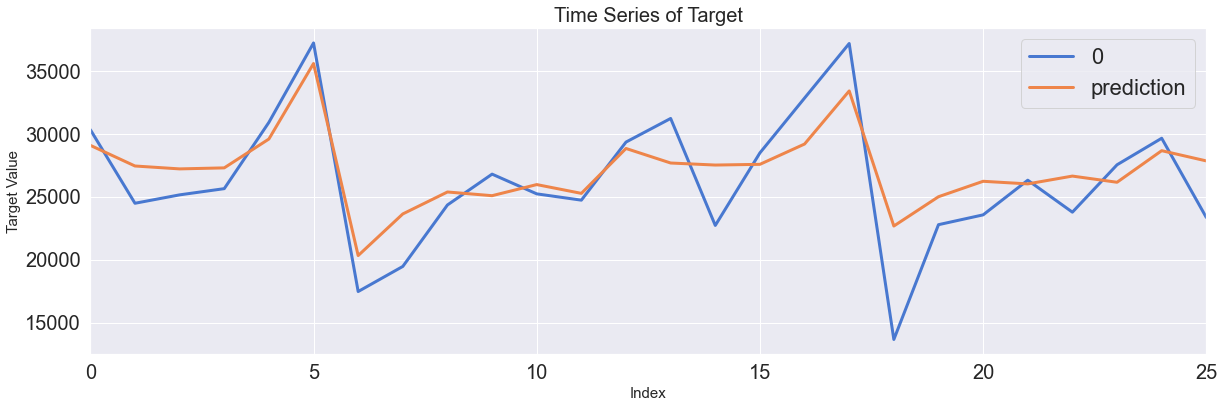

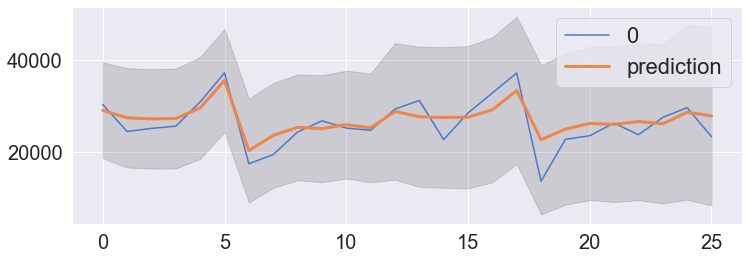

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Stationarity_adf  Stationarity_kpss  Normality  \
Test Statistics                          -2.17               0.44       0.99   
p-value                                   0.22               0.06       0.18   
Used Lag                                 11.00              14.00        nan   
Used Observations                       138.00                nan        nan   
Critical Value(1%)                       -3.48                nan        nan   
Maximum Information Criteria          2,519.80                nan        nan   
Critical Value(10%)                        nan               0.35        nan   
Alternative                                nan                nan        nan   

                              Autocorr(lag1)  Autocorr(lag5)  Autocorr(lag10)  \
Test Statistics                         5.29           17.68            68.38   
p-value                                 0.02            0.00             0.00   
Used Lag                                 nan             nan              nan   
Used Observations                        nan             nan              nan   
Critical Value(1%)                       nan             nan              nan   
Maximum Information Criteria             nan             nan              nan   
Critical Value(10%)                      nan             nan              nan   
Alternative                              nan             nan              nan   

                              Autocorr(lag50) Heteroscedasticity  
Test Statistics                        583.80               0.84  
p-value                                  0.00               0.45  
Used Lag                                  nan                NaN  
Used Observations                         nan                NaN  
Critical Value(1%)                        nan                NaN  
Maximum Information Criteria              nan                NaN  
Critical Value(10%)                       nan                NaN  
Alternative                               nan          two-sided

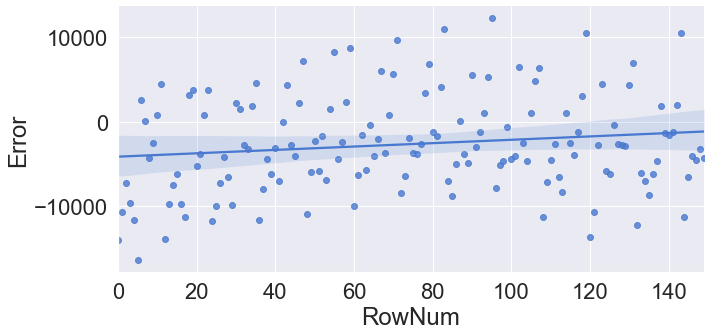

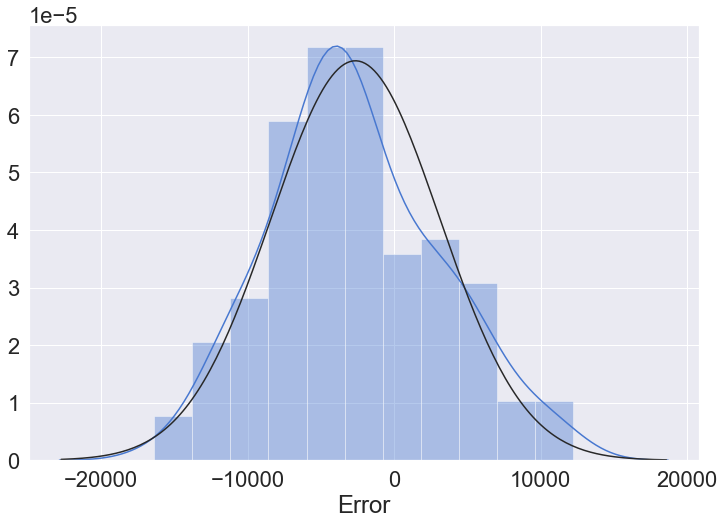

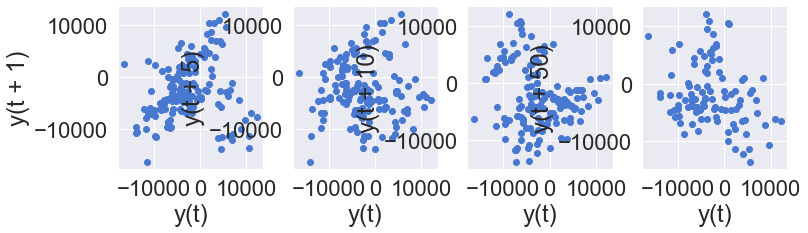

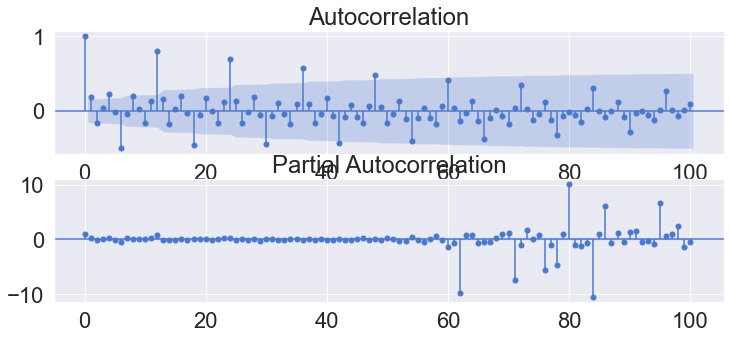

In [14]:
import pmdarima as pm
from pmdarima import model_selection

# Data Loading and Split
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=150)

# 모델링
autoarima = pm.auto_arima(train,  
                          stationary=False,
                          with_intercept=True,
#                           start_p=0, d=None, start_q=0,
#                           max_p=5, max_d=1, max_q=5,
                          seasonal=True, m=12,
#                           start_P=0, D=None, start_Q=0,
#                           max_P=5, max_D=1, max_Q=5,
                          max_order=30, maxiter=5,
                          information_criterion='bic',
                          trace=True, suppress_warnings=True)
display(autoarima.summary())
pred_tr_ts_autoarima = autoarima.predict_in_sample()
pred_tr_ts_autoarima = autoarima.predict(n_periods=len(train))
pred_te_ts_autoarima = autoarima.predict(n_periods=len(test), 
                                         return_conf_int=True)[0]
pred_te_ts_autoarima_ci = autoarima.predict(n_periods=len(test), 
                                            return_conf_int=True)[1]

# 검증
Score_ts_autoarima, Resid_tr_ts_autoarima, Resid_te_ts_autoarima = evaluation_trte(pd.DataFrame(train), pred_tr_ts_autoarima, 
                                                                                   pd.DataFrame(test), pred_te_ts_autoarima, graph_on=True)
display(Score_ts_autoarima)
ax = pd.DataFrame(test).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_autoarima, columns=['prediction']).plot(kind='line',
                                                                linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_autoarima_ci).index,
                pd.DataFrame(pred_te_ts_autoarima_ci).iloc[:,0],
                pd.DataFrame(pred_te_ts_autoarima_ci).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_autoarima, ['Error'], pd.DataFrame(train), graph_on=True)

In [15]:
import pmdarima as pm

# Data Loading
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Feature Engineering
raw_fe = feature_engineering(raw_all)
### Reality ###
target = ['count_trend', 'count_seasonal', 'count_Day', 'count_Week', 'count_diff']
raw_feR = feature_engineering_year_duplicated(raw_fe, target)
###############

# Data Split
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_train_feR, X_test_feR, Y_train_feR, Y_test_feR = datasplit_ts(raw_feR, Y_colname, X_colname, '2012-07-01')
### Reality ###
target = ['count_lag1', 'count_lag2']
X_test_feR = feature_engineering_lag_modified(Y_test_feR, X_test_feR, target)
###############
### Scaling ###
X_train_feRS, X_test_feRS = feature_engineering_scaling(preprocessing.Normalizer(), X_train_feR, X_test_feR)
###############
### Multicollinearity ###
print('Number_of_Total_X: ', len(X_train_feRS.columns))
X_colname_vif = feature_engineering_XbyVIF(X_train_feRS, 12)
print('Number_of_Selected_X: ', len(X_colname_vif))
X_train_feRSM, X_test_feRSM = X_train_feRS[X_colname_vif].copy(), X_test_feRS[X_colname_vif].copy()
#########################

# 모델링
## Parameter Setting
trend_diff_order = 0
seasonal_diff_order, seasonal_order = 0, 24
## SARIMAX
fit_ts_autoarima = pm.auto_arima(Y_train_feR, 
                                 stationary=False,
                                 with_intercept=True,
                                 start_p=0, d=None, start_q=0,
                                 max_p=2, max_d=1, max_q=2,
                                 seasonal=True, m=24,
                                 start_P=0, D=None, start_Q=0,
                                 max_P=2, max_D=1, max_Q=2,
                                 max_order=30, maxiter=3,
                                 stepwise=False,
                                 exogenous=X_train_feRSM,
                                 information_criterion='aic',
                                 trace=True, suppress_warnings=True)
display(fit_ts_autoarima.summary())
pred_tr_ts_autoarima = fit_ts_autoarima.predict_in_sample(exogenous=X_train_feRSM)
pred_tr_ts_autoarima = fit_ts_autoarima.predict(n_periods=len(Y_train_feR), exogenous=X_train_feRSM)
pred_te_ts_autoarima = fit_ts_autoarima.predict(n_periods=len(Y_test_feR), 
                                                exogenous=X_test_feRSM, 
                                                return_conf_int=True)[0]
pred_te_ts_autoarima_ci = fit_ts_autoarima.predict(n_periods=len(Y_test_feR), 
                                                   exogenous=X_test_feRSM, 
                                                   return_conf_int=True)[1]

# 검증
Score_ts_autoarima, Resid_tr_ts_autoarima, Resid_te_ts_autoarima = evaluation_trte(Y_train_feR, pred_tr_ts_autoarima, 
                                                                                   Y_test_feR, pred_te_ts_autoarima, graph_on=True)
display(Score_ts_autoarima)
ax = pd.DataFrame(Y_test_feR).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_autoarima, 
             index=Y_test_feR.index, columns=['prediction']).plot(kind='line',
                                                                  xlim=(Y_test_feR.index.min(),Y_test_feR.index.max()),
                                                                  linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test_feR.index).index,
                pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test_feR.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test_feR.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_autoarima, ['Error'], Y_train_feR, graph_on=True)

Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Number_of_Total_X:  24
Number_of_Selected_X:  12
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=144356.033, Time=0.77 sec
 ARIMA(0,1,0)(0,0,1)[24] intercept   : AIC=141777.341, Time=26.02 sec
 ARIMA(0,1,0)(0,0,2)[24] intercept   : AIC=141717.272, Time=131.09 sec


MemoryError: Unable to allocate 2.50 MiB for an array with shape (25, 1, 13128) and data type float64